This example will demonstrate how to use the randomization inference tools to analyze the results of a two variant A/B test, where the primary metric is continuous (e.g. dollars spent).  We'll first look at an example where the distributions of the continuous metric in both the control and treatment group are nicely behaved.  Here, conventional techniques like a t-test are sufficient.  We'll compare the application of the t-test to the randomization inference results.  

In a second example, we'll look at data from an experiment where the outcome metric is heavily skewed by zeros (zero inflated).  In this case, the usual t-test approach is not applicable.  Instead, we'll use the randomization inference tools to look at the experiment results without needing to make any parametric assumptions about our data.  

In [1]:
import sys
import pandas as pd

In [2]:
import scipy.stats as stats
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style

In [4]:
style.use('fivethirtyeight')

In [5]:
# For now, this is a simple way to import the tools we need.
# Be sure to update the path to point to where the relevant code is stored on your machine
# TBD on eventually making this importable
sys.path.append('../../../ab_testing_utils/')

In [6]:
import skewed_metric_utils
import sim_utils

### Conventional example

First, we need to simulate some data.  We can use some of the pre-built tools in sim_utils.  

Here, we'll assume that we're looking at the results of a two variant A/B test.  Furthemore, we'll assume that:

1. took place over the course of 3 weeks (3 * 7 = 21 days)  
2. On average, we had about 300 eligible units per day that could be assigned to either treatment or control 
3. The assignment to treatment or control is even. i.e. the probability of being assigned to the control group is 50%
4. Our primary metric here is dollars spent per unit
5. In the control group, we'll assume that the mean dollars spent per unit is \\$1,000.  In the treatment group, we'll assume that the mean is \\$1,050, i.e. the treatment really did have a positive impact.  

To make this simple, we'll just assume that the dollars spent in each group follows a normal distribution, centered on the mean. This means that the mean dollars spent is an appropriate test statistic here.  

In [7]:
daily_num_observations = 300
number_of_days_for_experiment = 3 * 7
p_vals = "equal"
group_col = 'group'

In [8]:
simulate_data = sim_utils.SimulateSkewedContinuous()

In [9]:
df_norm = simulate_data.simulate_skewed_experiment(number_of_days_for_experiment=number_of_days_for_experiment, 
                                                  daily_num_observations=daily_num_observations,
                                                  p_vals=p_vals, 
                                                  group_col=group_col,
                                                  zero_skewed_outcome=False,
                                                  loc_params=(1000, 1050),
                                                  scale_params=(600, 600))

Simulated group sizes: 

control        0.501124
treatment_1    0.498876
Name: group, dtype: float64


Simulated daily group sizes: 

day  group      
0    control        0.534653
     treatment_1    0.465347
1    treatment_1    0.509259
     control        0.490741
10   treatment_1    0.534296
     control        0.465704
11   treatment_1    0.518519
     control        0.481481
12   control        0.509158
     treatment_1    0.490842
13   treatment_1    0.515254
     control        0.484746
14   control        0.519713
     treatment_1    0.480287
15   treatment_1    0.500000
     control        0.500000
16   control        0.510563
     treatment_1    0.489437
17   treatment_1    0.508251
     control        0.491749
18   treatment_1    0.503311
     control        0.496689
19   treatment_1    0.510274
     control        0.489726
2    control        0.535714
     treatment_1    0.464286
20   control        0.524138
     treatment_1    0.475862
3    control        0.517123
     tre

In [10]:
df_norm.head()

,day,units,group,outcome
0,0,1,control,1470.039
1,0,1,control,336.855
2,0,1,control,532.705
3,0,1,control,-27.995
6,0,1,control,1748.734


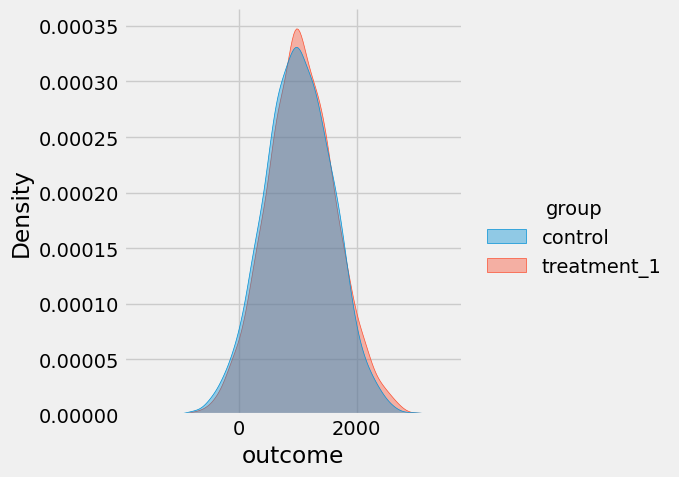

In [11]:
sns.displot(df_norm, x="outcome", hue="group", kind="kde", fill=True, alpha=0.4)

In [12]:
# So these are nice and simple 
# This looks about like what we'd expect from the relatively large sample we drew
df_norm.groupby('group')['outcome'].describe(percentiles=[0.25, 0.5, 0.75, 0.9])

,count,mean,std,min,25%,50%,75%,90%,max
group,,,,,,,,,
control,3120.0,1007.386044,589.161841,-1176.738,609.62500,1001.0715,1412.86750,1756.0639,3103.156
treatment_1,3106.0,1050.029246,593.839759,-1346.630,652.97075,1032.5085,1437.89575,1806.9725,3164.940


In [13]:
# So what happens if we run a conventional t-test on this?
# In this case, we know that the data generating process in both the treatment and control groups have the same variance.  In general though, we won't know this, so we won't assume it
stats.ttest_ind(a=df_norm.query("group=='control'")['outcome'], b=df_norm.query("group=='treatment_1'")['outcome'], equal_var=False)

Ttest_indResult(statistic=-2.8442036058656903, pvalue=0.004466783648510512)

In [14]:
# So the t-test (correctly) indicates a statistically significant difference in the means between the two groups.  
# In this case, the treatment mean is statistically significantly larger than the control group mean

In [15]:
# How about if we did the same thing with randomization inference? 
test_mean_difference_normal_dist = skewed_metric_utils.RandomizationInference()

Running randomization inference...


  0%|          | 0/1000 [00:00<?, ?it/s]

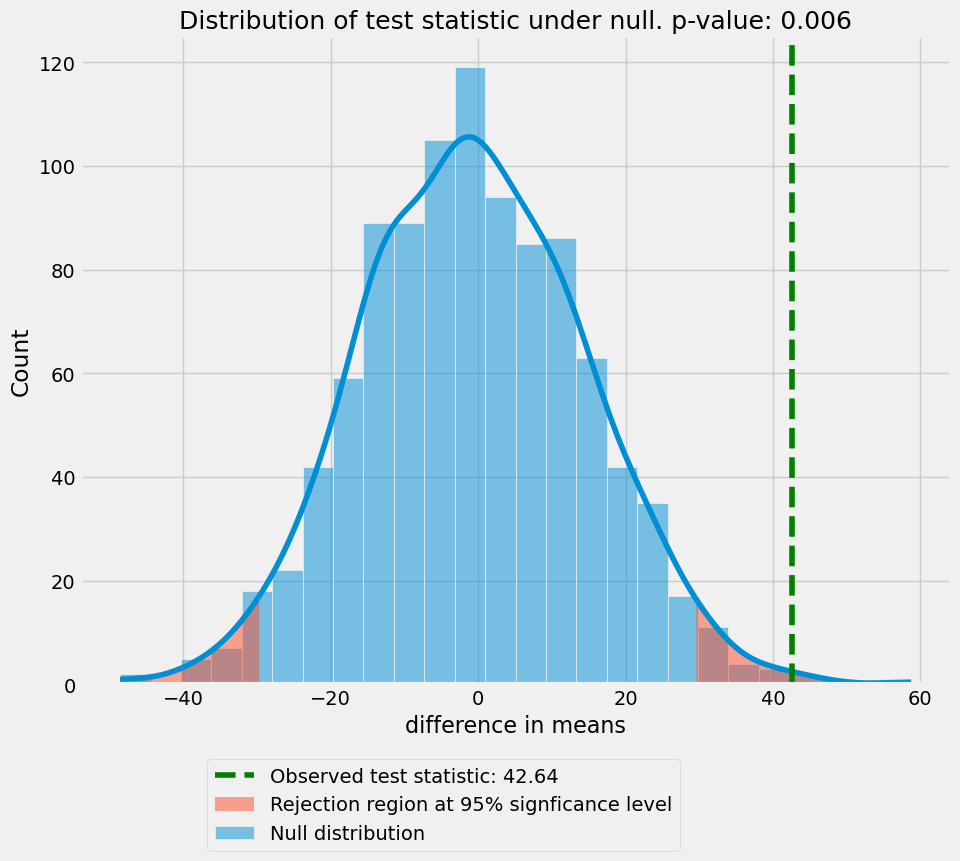

In [16]:
test_mean_difference_normal_dist.experimental_analysis(df=df_norm, 
                                                       outcome_column_name='outcome', 
                                                       treatment_column_name='group', 
                                                       treatment_name='treatment_1', 
                                                       control_name='control', 
                                                       sample_with_replacement=True)

In [24]:
# So the conclusion is the same. 
# This is not surprising as this is a highly contrived example

### Zero inflated example

In this example, we'll make the same 5 assumptions as we did in the previous example.  However, this time around, we'll assume that the dollars spent in each group comes from a highly skewed distribution, biased towards zero.  This would be the case if most people actually don't spend anything at all. 





# REMOVE THIS 


First, we need to simulate some data.  We can use some of the pre-built tools in sim_utils.  

Here, we'll assume that we're looking at the results of a two variant A/B test.  Furthemore, we'll assume that:

1. took place over the course of 3 weeks (3 * 7 = 21 days)  
2. On average, we had about 300 eligible units per day that could be assigned to either treatment or control 
3. The assignment to treatment or control is even. i.e. the probability of being assigned to the control group is 50%
4. Our primary metric here is dollars spent per unit
5. In the control group, we'll assume that the mean dollars spent per unit is \\$1,000.  In the treatment group, we'll assume that the mean is \\$1,050, i.e. the treatment really did have a positive impact.  

To make this simple, we'll just assume that the dollars spent in each group follows a normal distribution, centered on the mean. This means that the mean dollars spent is an appropriate test statistic here.  

In [17]:
daily_num_observations = 300
number_of_days_for_experiment = 3 * 7
p_vals = "equal"
group_col = 'group'

In [26]:
simulate_data = sim_utils.SimulateSkewedContinuous()

In [89]:
df_skewed = simulate_data.simulate_skewed_experiment(number_of_days_for_experiment=number_of_days_for_experiment, 
                                                     daily_num_observations=daily_num_observations,
                                                     p_vals=p_vals, 
                                                     group_col=group_col,
                                                     zero_skewed_outcome=True,
                                                     a_params=(0.05, 0.1),
                                                     scale_params=(1000, 1000))

Simulated group sizes: 

treatment_1    0.502304
control        0.497696
Name: group, dtype: float64


Simulated daily group sizes: 

day  group      
0    control        0.535836
     treatment_1    0.464164
1    control        0.532609
     treatment_1    0.467391
10   treatment_1    0.524752
     control        0.475248
11   control        0.504983
     treatment_1    0.495017
12   control        0.513793
     treatment_1    0.486207
13   treatment_1    0.517123
     control        0.482877
14   treatment_1    0.571429
     control        0.428571
15   control        0.512739
     treatment_1    0.487261
16   treatment_1    0.540351
     control        0.459649
17   control        0.526490
     treatment_1    0.473510
18   treatment_1    0.511785
     control        0.488215
19   treatment_1    0.503378
     control        0.496622
2    treatment_1    0.503125
     control        0.496875
20   treatment_1    0.530488
     control        0.469512
3    control        0.501718
     tre

In [90]:
df_skewed.head()

,day,units,group,outcome
0,0,1,treatment_1,3.300
1,0,1,treatment_1,0.867
2,0,1,treatment_1,6.355
4,0,1,treatment_1,0.000
5,0,1,treatment_1,858.622


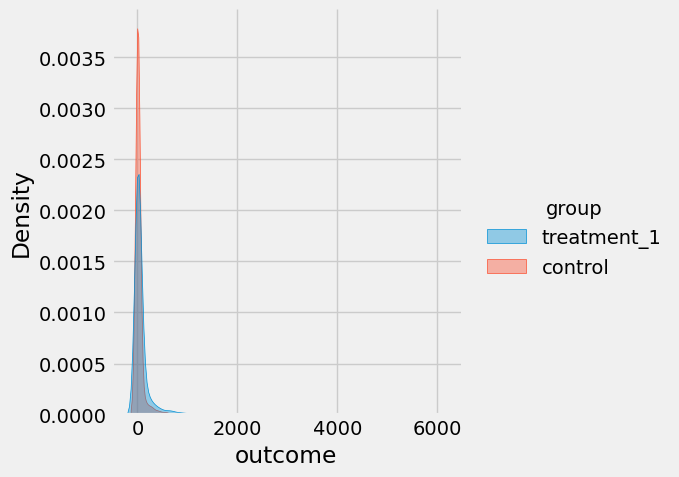

In [91]:
sns.displot(df_skewed, x="outcome", hue="group", kind="kde", fill=True, alpha=0.4)

In [92]:
df_skewed.groupby('group')['outcome'].describe(percentiles=[0.25, 0.5, 0.75, 0.9])

,count,mean,std,min,25%,50%,75%,90%,max
group,,,,,,,,,
control,3132.0,49.875535,228.013983,0.0,0.0,0.000,1.91425,74.4809,4069.457
treatment_1,3161.0,101.816269,336.014053,0.0,0.0,0.629,37.31900,253.0800,5956.491


In [93]:
stats.ttest_ind(a=df_skewed.query("group=='control'")['outcome'], b=df_skewed.query("group=='treatment_1'")['outcome'], equal_var=False)

Ttest_indResult(statistic=-7.180959873755128, pvalue=7.830483333452269e-13)

In [94]:
test_mean_difference_skewed_dist = skewed_metric_utils.RandomizationInference()

Running randomization inference...


  0%|          | 0/1000 [00:00<?, ?it/s]

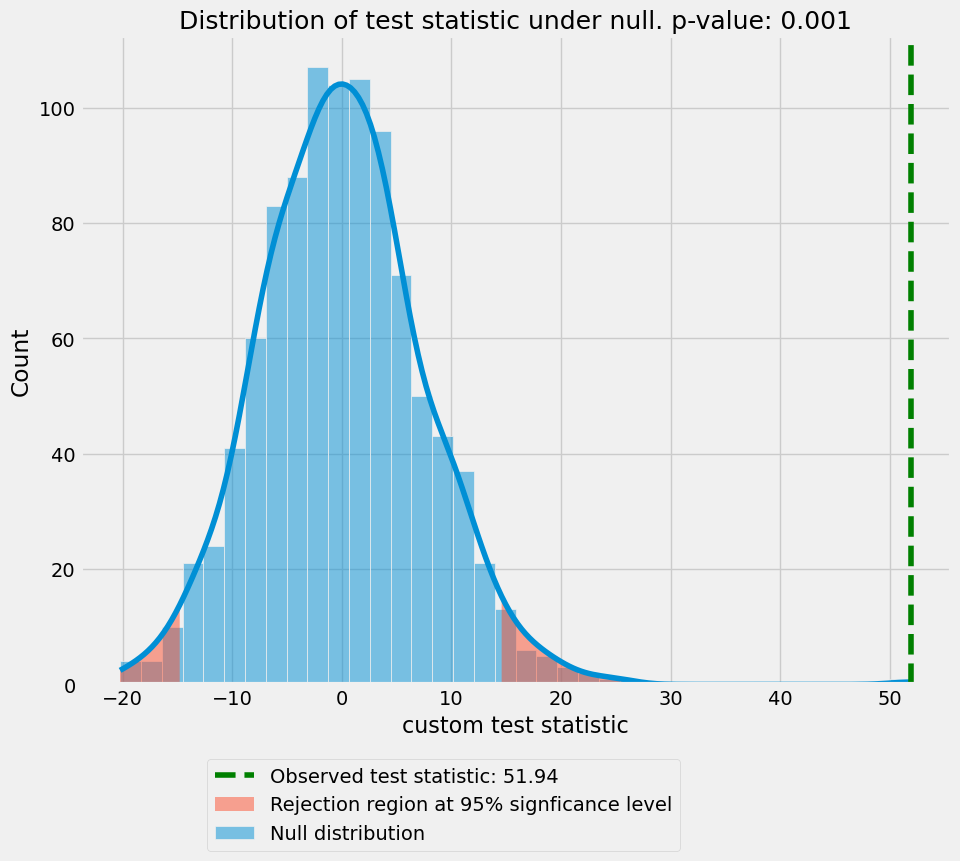

In [95]:
test_mean_difference_skewed_dist.experimental_analysis(df=df_skewed, 
                                                       outcome_column_name='outcome', 
                                                       treatment_column_name='group', 
                                                       treatment_name='treatment_1', 
                                                       control_name='control', 
                                                       sample_with_replacement=True)

Running randomization inference...


  0%|          | 0/1000 [00:00<?, ?it/s]

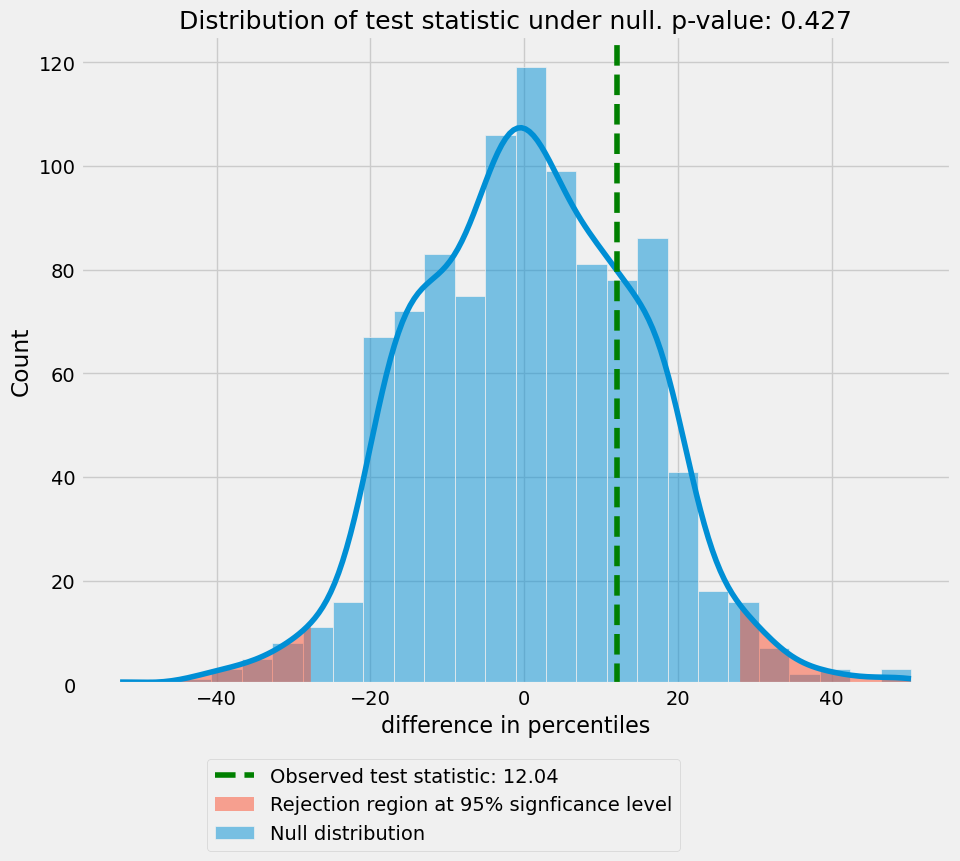

In [83]:
test_mean_difference_skewed_dist.experimental_analysis(df=df_skewed, 
                                                       outcome_column_name='outcome', 
                                                       treatment_column_name='group', 
                                                       treatment_name='treatment_1', 
                                                       control_name='control', 
                                                       sample_with_replacement=True,
                                                       test_statistic={'function': 'difference_in_percentiles', 'params': {'quantile': 0.9}})

In [96]:
# Not sure that this methodology for simulating a zero skewed distribution really works. Let's try something different